# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [446]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
<span style="color:blue"> There are 1898 rows and 9 columns in the data frame</span>

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [51]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
<span style="color:blue"> There are 4 interger columns, 4 string columns and 1 float column in the data frame</span>

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0]})

,Count


#### Observations:
<span style="color:blue"> There are no missing values in the data </span>

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
<span style="color:blue">  The 
   minimum time  = 20 minutes
   , average time    = 27.37197 minutes
   , maximum time = 35 minutes
   for food to be prepared once an order is placed </span>

### **Question 5:** How many orders are not rated? [1 mark]

In [32]:
# Write the code here
newdf = df[df['rating'] == 'Not given']
newdf['rating'].count()

736

#### Observations:
<span style="color:blue">  736 orders are not rated </span>

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [514]:
# Write the code here

#1. Insights into customer_id

#Top 3 Repeating customers
x2 = df.groupby(['customer_id'],as_index = False)['customer_id'].value_counts().sort_values('count',ascending = False).head(3) 
x2

#df[df['customer_id'] == 47440]

,customer_id,count
116,52832,13
84,47440,10
333,83287,9


In [385]:
#2. Insights into restaurant_name

#Top 3 Restaurants with the highest number of orders
x4 = df.groupby(['restaurant_name'],as_index = False)['restaurant_name'].value_counts().sort_values('count',ascending = False).head(3)
x4


,restaurant_name,count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119


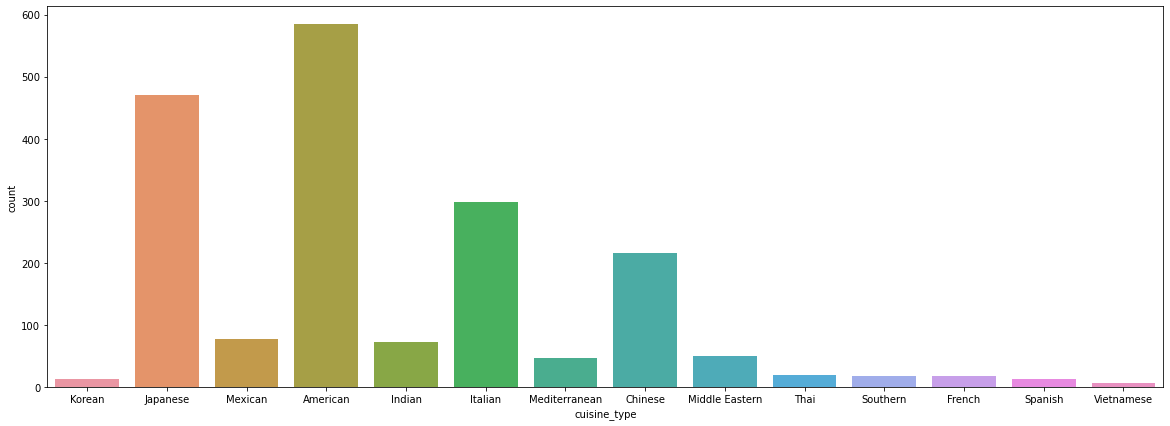

In [378]:
#3. Insights into cuisine_type

#American cuisine type is the most favored
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type') ;

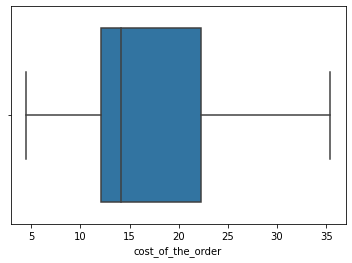

In [396]:
#4. Insights into cost_of_the_order
sns.boxplot(data=df, x='cost_of_the_order');

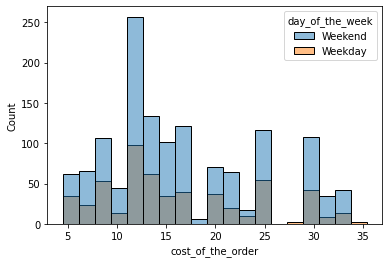

In [516]:
sns.histplot(data=df, x='cost_of_the_order', hue='day_of_the_week');

'42.36%'

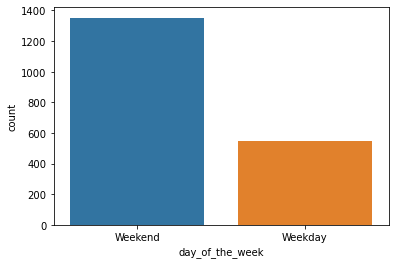

In [412]:
#5. Insights into day_of_the_week

#Number of orders placed on weekends is > weekdays
sns.countplot(data=df, x='day_of_the_week') ;

#% increase in orders on weekends 
df_we = df[df['day_of_the_week'] == 'Weekend']
df_wd = df[df['day_of_the_week'] == 'Weekday']
"{0:.2f}%".format(100 * (df_we.shape[0] /df.shape[0]) - 100 * (df_wd.shape[0] /df.shape[0]))


'38.78%'

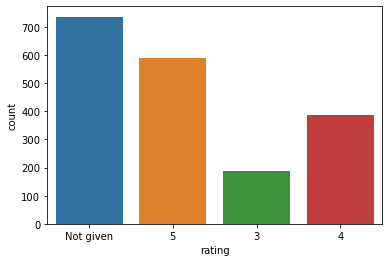

In [413]:
#6. Insights into rating

#Most number of people do not provide a rating
sns.countplot(data=df, x='rating') ;


newdf = df[df['rating'] == 'Not given']
"{0:.2f}%".format(100 * (newdf.shape[0] /df.shape[0]))

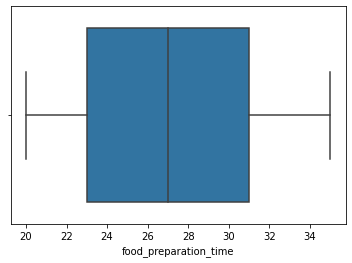

In [394]:
#7. Insights into food_preparation_time
sns.boxplot(data=df, x='food_preparation_time');

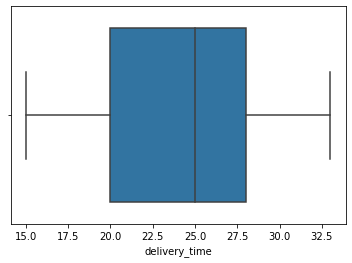

In [395]:
#8. Insights into delivery_time

sns.boxplot(data=df, x='delivery_time');

### Observations
<span style="color:blue">  
    <br> American cuisine "Shake Shack" restaurant receives the highest number of orders i.e 219
    <br> American cuisine type is the most favored cuisine
    <br> Orders on weekends is 42.36% more than orders placed on weekdays
    <br> 38.78% of orders do not receive a rating
    <br> The mean food_preparation_time is ~27 minutes
    <br> The mean delivery_time is ~24 minutes
    <br>  </span>

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [373]:
# Write the code here
df['restaurant_name'].value_counts().sort_values(ascending = False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
<span style="color:blue">  The top 5 restaurants in terms of the number of orders received
    <br> Shake Shack                  :219
    <br> The Meatball Shop            :132
    <br> Blue Ribbon Sushi            :119
    <br> Blue Ribbon Fried Chicken     :96
    <br> Parm                          :68 </span>

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [45]:
# Write the code here
newdf = df[df['day_of_the_week'] == 'Weekend']
newdf['cuisine_type'].value_counts().index[0]

'American'

#### Observations:
<span style="color:blue">  The most popular cuisine on weekends is American </span>

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [414]:
# Write the code here
newdf = df[df['cost_of_the_order'] > 20]
"{0:.2f}%".format((newdf.shape[0] /df.shape[0]) * 100)

'29.24%'

#### Observations:
<span style="color:blue">  29.24% of the orders cost more than 20 dollars
</span>

### **Question 10**: What is the mean order delivery time? [1 mark]

In [33]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
<span style="color:blue">  The mean order delivery time is 24.16 minutes </span>

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [52]:
# Write the code here
df['customer_id'].value_counts().sort_values(ascending = False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
<span style="color:blue">  The IDs of the top 3 customers and the number of orders they placed are -
    <br> customer_id      :Count of orders
    <br> 52832            :13
    <br> 47440            :10
    <br> 83287            :9
 </span>

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [404]:
# Write the code here

#1. Insights into customer_id and 'cuisine_type'

#Cuisine type is in demand 
x1 = df.groupby(['customer_id', 'cuisine_type'],as_index = False)['customer_id'].value_counts().sort_values('count',ascending = False).head(5)  
x1

,customer_id,cuisine_type,count
94,47440,American,10
606,115213,Indian,6
485,97079,Japanese,6
494,97991,Japanese,6
964,250494,American,6


In [401]:
#2. Insights into restaurant_name and 'cuisine_type'

#Top 3 restaurants that received maximum number of orders

x3 = df.groupby(['restaurant_name', 'cuisine_type'],as_index = False)['restaurant_name'].value_counts().sort_values('count',ascending = False).head(3) 
x3

,restaurant_name,cuisine_type,count
136,Shake Shack,American,219
21,Blue Ribbon Sushi,Japanese,119
154,The Meatball Shop,Italian,112


In [390]:
#The Meatball Shop is the only restaurant that serves more than 1 cuisine type i.e American and Italian

x5 = df.groupby(['restaurant_name', 'cuisine_type'],as_index = False)['restaurant_name'].value_counts().sort_values('restaurant_name')
x5
x6 = x5.groupby(['restaurant_name'],as_index = False)['restaurant_name'].value_counts()
x6[x6['count'] > 1]
x5[x5['restaurant_name'] =='The Meatball Shop']

,restaurant_name,cuisine_type,count
153,The Meatball Shop,American,20
154,The Meatball Shop,Italian,112


In [441]:
#3. Insights into restaurant_name and 'customer_id'

# Maximum times a customer has ordered from the same restaurant
x3 = df.groupby(['customer_id', 'restaurant_name'],as_index = False)['customer_id'].value_counts().sort_values('count',ascending = False).head(5)  
x3

,customer_id,restaurant_name,count
519,97991,Blue Ribbon Sushi Bar & Grill,6
96,47440,Bareburger,6
517,97806,Shake Shack,5
412,84087,The Meatball Shop,5
1049,270525,The Smile,4


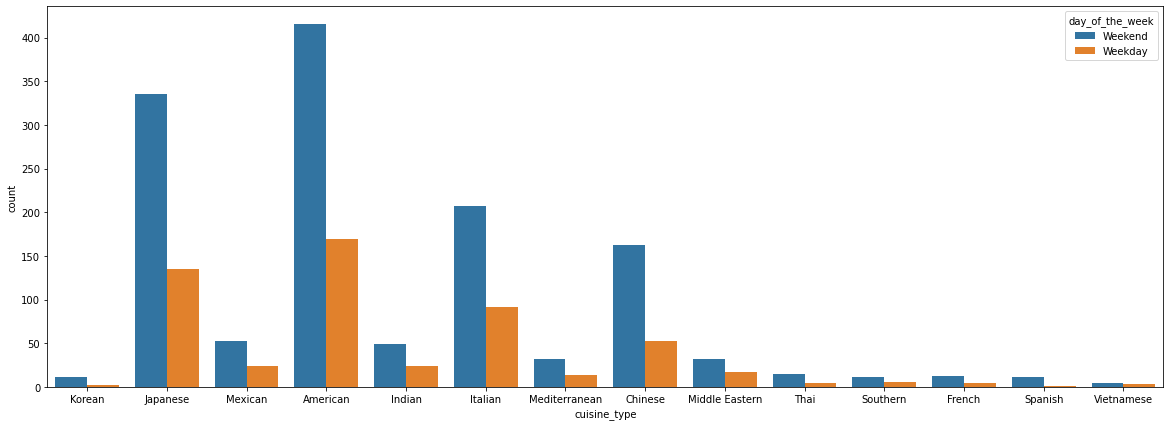

In [442]:
#4. Insights into day_of_the_week and 'cuisine_type'

# American cuisine type continues to be the most favored on weekdays and weekends
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week');

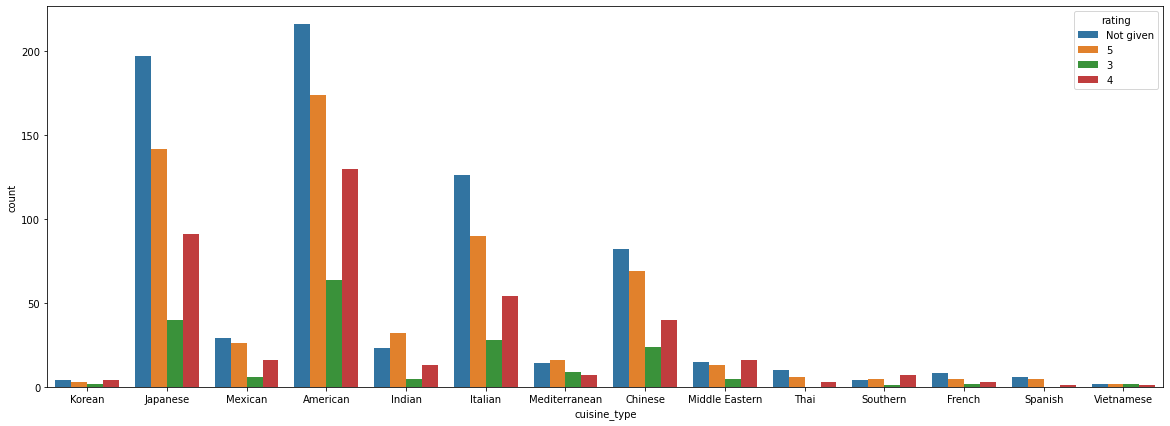

In [443]:
#5. Insights into rating and 'cuisine_type'

plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type', hue='rating');

In [454]:
#6. Insights into rating and 'restaurant_name'

#plt.figure(figsize=(10,40))
#sns.stripplot(data=df, x='rating', y='restaurant_name');

### Observations

<span style="color:blue"> The intent here was to list restaurants that were rated low in comparison to the rest of the restaurants but the data does not fit in the frame as the number of restaurants are large. </span>

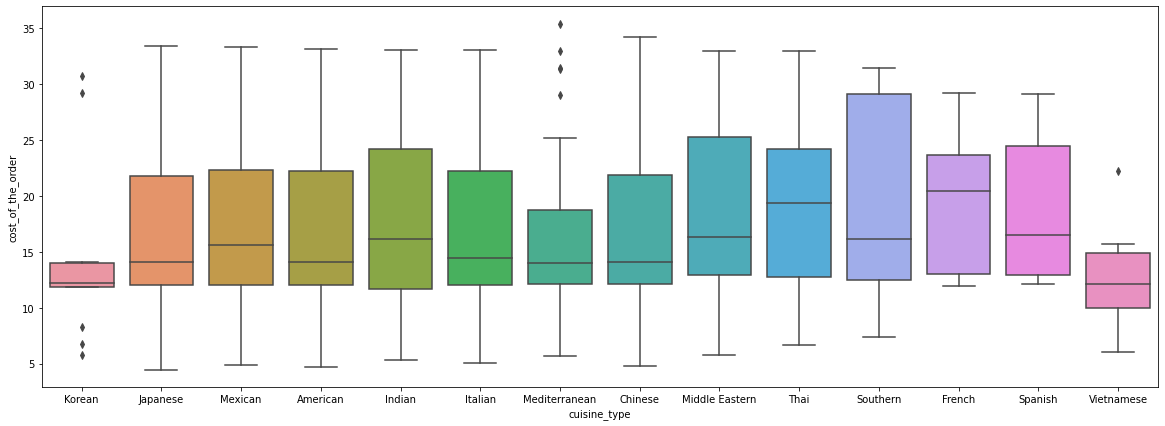

In [460]:
#7. Insights into cost_of_the_order and 'cuisine_type'

plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order') ;

#df[df['cuisine_type'] == 'Southern'].sort_values('cost_of_the_order')

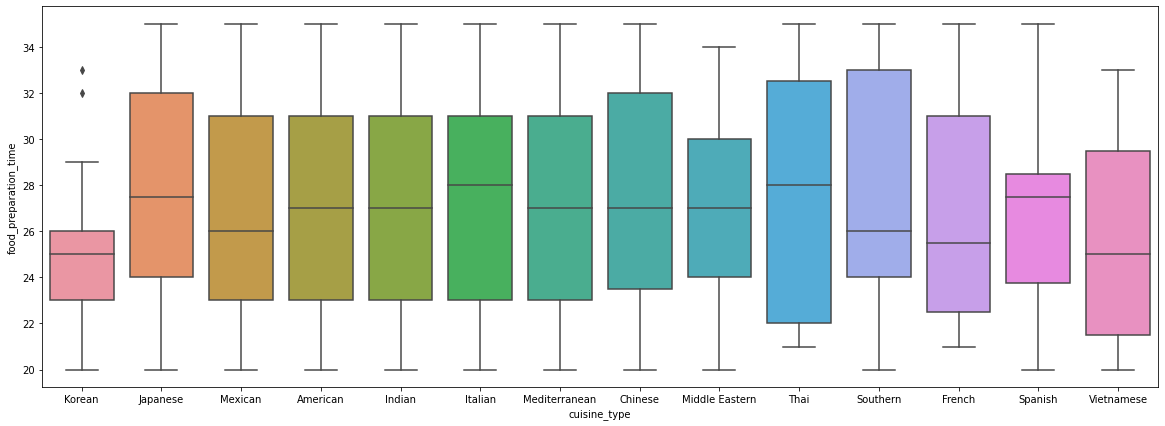

In [461]:
#8. Insights into food_preparation_time and 'cuisine_type'

plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time') ;

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [282]:
# Write the code here
newdf = df[df['rating'] != 'Not given']  #filter out rows that do not have a rating

k = newdf['restaurant_name'].value_counts().loc[lambda x : x>50].index.to_list() #Condition 1 : rating count of more than 50
l = newdf[newdf['restaurant_name'].isin(k)]
l = l.astype({'rating':'int'}) #convert rating to integer 
#print(l.dtypes)
m = l.groupby(['restaurant_name'], as_index = False)['rating'].agg('mean') #Find the average
m.loc[m['rating'] >=4] #Condition 2 : avg rating >= 4


,restaurant_name,rating
0,Blue Ribbon Fried Chicken,4.328125
1,Blue Ribbon Sushi,4.219178
2,Shake Shack,4.278195
3,The Meatball Shop,4.511905


#### Observations:
<span style="color:blue"> The restaurants fulfilling the criteria to get the promotional offer are
<br>Blue Ribbon Fried Chicken
<br>Blue Ribbon Sushi
<br>Shake Shack
<br>The Meatball Shop
</span>


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [330]:
# Write the code here
#df[df['cost_of_the_order'] < 5]
def apply_charges(x):  # function to apply charges
    if x <= 5:
        y = x
    elif 5 < x <= 20: 
        y = x + (x * 0.15)
    elif x > 20:
        y = x + (x * 0.25)
    return y

df_1 = df.copy()
df_1 = df_1.assign (cost_charges = 0) # new column 
df_1['cost_charges'] = df_1['cost_of_the_order'].apply(apply_charges) # add the charges 
df_1 = df_1.assign(net_revenue = df_1['cost_charges'] - df_1['cost_of_the_order']) # net revenue is the difference of cost and expenses
"{0:.2f}$".format(df_1['net_revenue'].sum())


'6166.30$'

#### Observations:
<span style="color:blue"> 6166.30$ is the net revenue generated by the company across all orders </span>

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [289]:
# Write the code here
df_upd = df.copy()
df_upd = df_upd.assign (total_time = df_upd.food_preparation_time + df_upd.delivery_time )
df_upd1 = df_upd[df_upd['total_time'] > 60]
"{0:.2f}%".format(df_upd1.shape[0] /df_upd.shape[0] * 100)

'10.54%'

#### Observations:
<span style="color:blue"> 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed</span>



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [102]:
# Write the code here
df_weekdays = df[df['day_of_the_week'] == 'Weekday']
df_weekends = df[df['day_of_the_week'] == 'Weekend']

In [100]:
df_weekdays['delivery_time'].describe().T

count    547.000000
mean      28.340037
std        2.891428
min       24.000000
25%       26.000000
50%       28.000000
75%       31.000000
max       33.000000
Name: delivery_time, dtype: float64

<span style="color:blue"> The mean delivery time on weekdays is 28.34 minutes </span>

In [101]:
df_weekends['delivery_time'].describe().T

count    1351.000000
mean       22.470022
std         4.628938
min        15.000000
25%        18.500000
50%        22.000000
75%        27.000000
max        30.000000
Name: delivery_time, dtype: float64

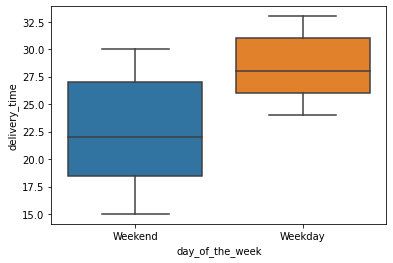

In [104]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time') ;

#### Observations:
<span style="color:blue"> The mean delivery time on weekends is 22.47 minutes </span>

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American cuisine serving "Shake Shack" restaurant receives the highest number of orders i.e 219
*  American cuisine type is the most favored cuisine
*  Orders on weekends is 42.36% more than orders placed on weekdays
*  38.78% of orders do not receive a rating
*  The mean food_preparation_time is ~27 minutes
*  The mean delivery_time is ~24 minutes
*  'The Meatball Shop' is the only restaurant that serves more than 1 cuisine type i.e American and Italian
*  'Blue Ribbon Sushi Bar & Grill' and 'Bareburger' restaurants have returning customers with orders placed as many as 6 times.  
*  American cuisine type continues to be the most favored on weekdays and weekends

### Recommendations:


* 'American' is the most favored cuisine type. There is value in including American food into the menu.

* 'The Meatball Shop' is the only restaurant that serves more than 1 cuisine type and is the 2nd largest in terms of orders placed. Expanding to serve more than 1 cuisine type is an option to drive sales up. 

* 38.78% of orders do not receive a rating. It is important for Foodhall to chalk out a plan to lower this percentage 



---